In [5]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
df = pd.read_csv("Cleaned-Data.csv")
df.head()


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [14]:
df.drop("Country", axis=1, inplace=True)

# Reemplazar los valores en las columnas Severity_None, Severity_Mild, Severity_Moderate y Severity_Severe
df['Severity_None'].replace({1: 'None', 0: 'No'}, inplace=True)
df['Severity_Mild'].replace({1: 'Mild', 0: 'No'}, inplace=True)
df['Severity_Moderate'].replace({1: 'Moderate', 0: 'No'}, inplace=True)
df['Severity_Severe'].replace({1: 'Severe', 0: 'No'}, inplace=True)

# Crear una nueva columna 'Condition' que combina los valores de las columnas de gravedad de los síntomas
def remove(lista):
    lista = set(lista)
    lista.discard("No")
    final = ''.join(lista)
    return final

df['Condition'] = df['Severity_None'] + df['Severity_Mild'] + df['Severity_Moderate'] + df['Severity_Severe']
df['Condition'] = df['Condition'].apply(remove)

In [16]:
# Transformar la columna 'Condition' en valores numéricos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])

In [23]:
X = df.drop(['Condition', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes'], axis=1)
y = df['Condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
# Entrenar un árbol de decisión

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

In [36]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisión: {accuracy:.2f}")

# Mostrar el informe de clasificación
report = classification_report(y_test, y_pred)
print(report)

Precisión del árbol de decisión: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23798
           1       1.00      1.00      1.00     23896
           2       1.00      1.00      1.00     23669
           3       1.00      1.00      1.00     23677

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040



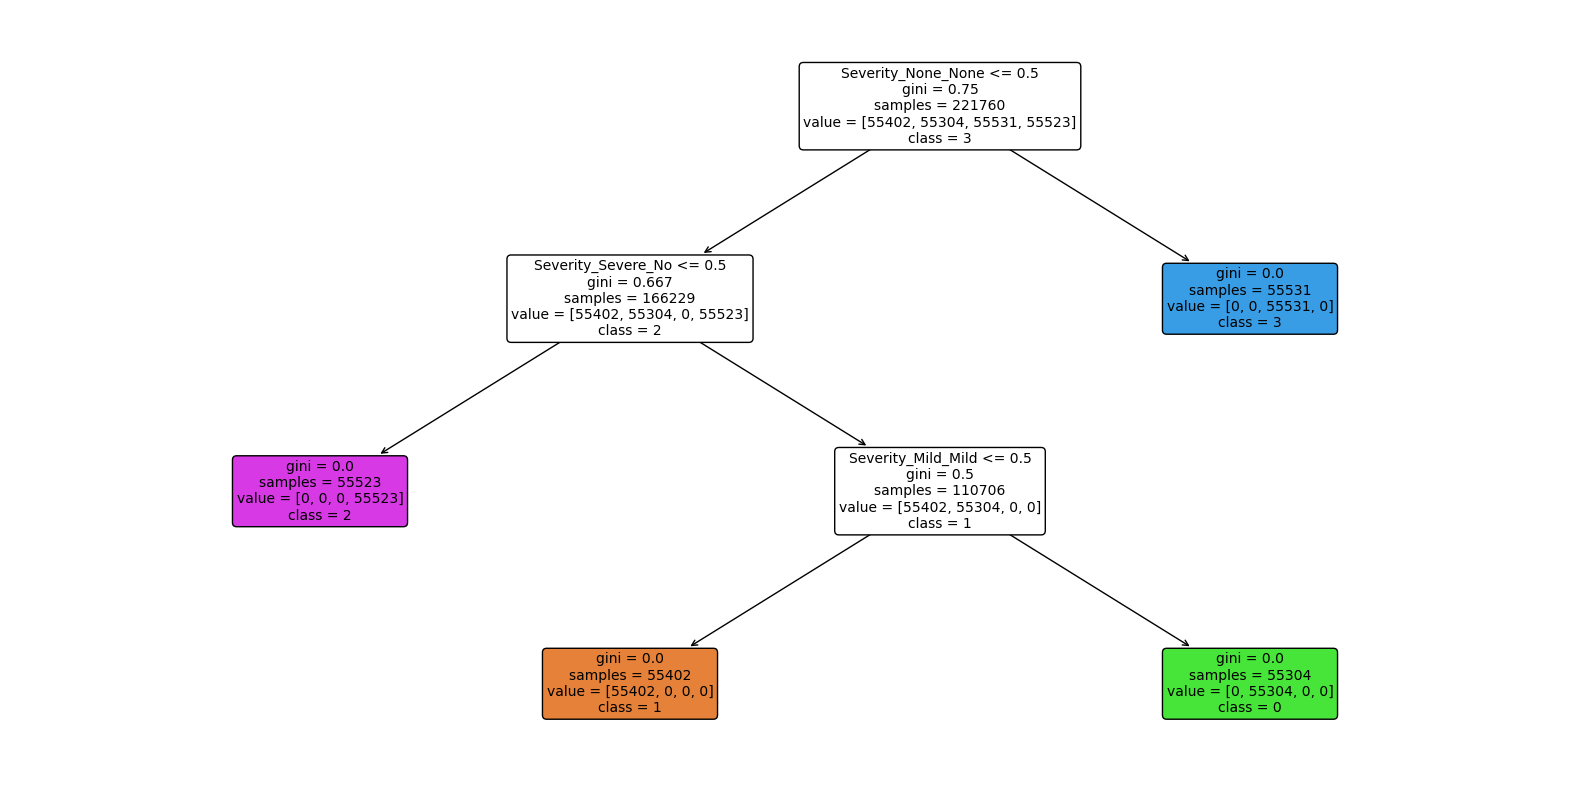

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = list(X_train.columns)

# Obtener nombres de clases como lista
class_names = df['Condition'].unique().astype(str).tolist()

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
plt.show()